In [1]:
import os
import sys
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [75]:
nx = 8*1024
ny = 8*1024

In [76]:
print(nx,ny)

8192 8192


In [77]:
X = np.zeros((nx,ny))
Y = np.zeros((nx,ny))

In [78]:
for i in range(nx):
    X[i,:] = 2.*np.pi*float(i/nx)
    
for j in range(ny):
    Y[:,j] = 2.*np.pi*float(j/ny)

In [79]:
def foo(x,y,lvl):
    taint = 0
    lx = x/(2.*np.pi)
    ly = y/(2.*np.pi)
    for k in range(lvl):
        digx = math.floor(3*lx)
        digy = math.floor(3*ly)
        if (digx==1)&(digy==1):
            return 0
        lx = (3.*lx-digx)
        ly = (3.*ly-digy)
    
    return 1

In [80]:
vfoo = np.vectorize(foo)

In [81]:
chi = vfoo(X,Y,5)

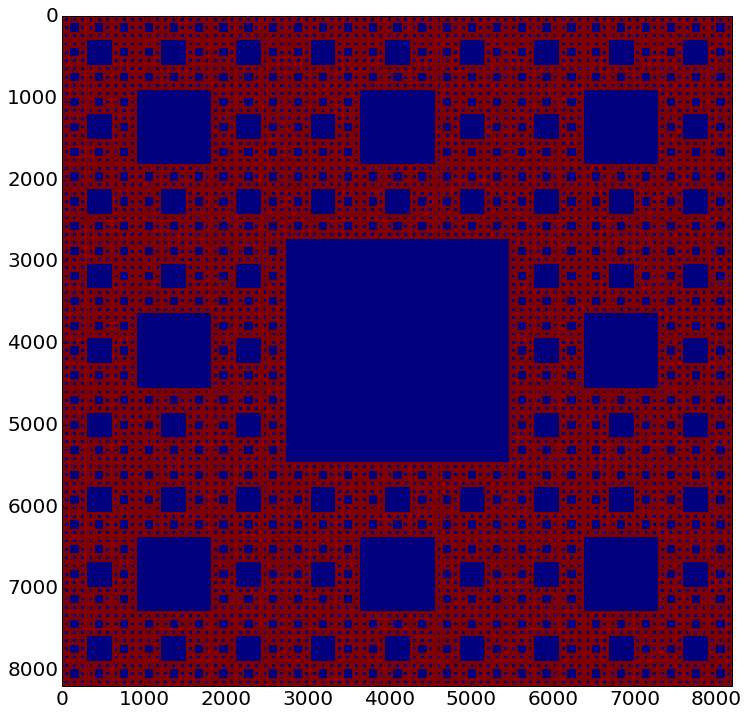

In [82]:
%matplotlib inline

plt.figure(figsize=(12,12))
plt.imshow(chi)

In [102]:
vFrac = np.average(chi)
nchi = (chi/(nx*ny))/vFrac

In [103]:
cchi = np.fft.rfft2(nchi)

In [104]:
tmp = cchi*(cchi.conj())

In [105]:
corr = np.fft.irfft2(tmp)

In [106]:
corr[(nx//2):nx,:] = 0.
corr[:,(ny//2):ny] = 0.

print(corr)

[[  2.68604292e-08   2.67021669e-08   2.65439047e-08 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  2.67021669e-08   2.65472819e-08   2.63923969e-08 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  2.65439047e-08   2.63923969e-08   2.62408892e-08 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]


In [107]:
r2 = X**2+Y**2
r2rt = np.sqrt(r2)
dx = (2.*np.pi)/nx
ner = int(nx*np.sqrt(3))
rbins = np.linspace(-0.5*dx,2*np.pi*np.sqrt(3)+0.5*dx,ner+1)

In [108]:
rCorr,redges = np.histogram(r2rt,range=(0.5*dx,(ner+0.5)*dx),bins = rbins,weights=corr)

In [109]:
r2,r2edges = np.histogram(r2rt,range=(0.5*dx,(ner+0.5)*dx),bins = rbins)

In [110]:
print(rCorr)

[  2.68604292e-08   7.99516158e-08   1.05872603e-07 ...,   0.00000000e+00
   0.00000000e+00   0.00000000e+00]


In [111]:
print(r2[0:100])

[  1   3   4   5   9   8  11  11  13  18  15  19  18  23  23  22  29  29
  29  30  29  37  36  37  37  43  42  41  47  44  51  49  48  53  57  57
  58  57  63  60  67  63  67  70  67  73  70  77  77  79  80  81  87  80
  85  89  86  95  85 101  94  93 101  96 107 101 107 106 107 111 108 111
 119 112 119 117 121 126 119 129 122 133 129 129 134 137 135 136 137 145
 141 144 143 151 144 151 151 154 167 149]


Sierpinsky carpet : Linear fit [alpha A] = [-1.06267718 -8.65348754]


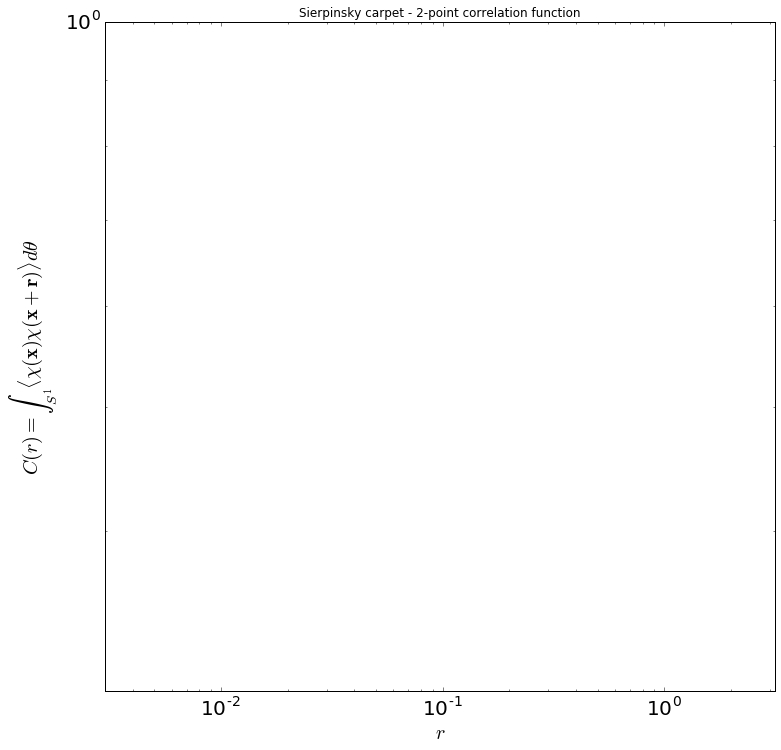

In [114]:
%matplotlib inline

matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20) 

idx = r2>0
rp=np.linspace(0.5*dx,(ner+0.5)*dx,ner)

lrp = rp[idx]

tempRp = lrp[(lrp>0.1)&(lrp<3.0)]

plt.figure(figsize=(12,12))
plt.xlabel(r'$r$', fontsize=20)
plt.ylabel(r'$ C(r) = \int_{S^1} \langle \chi({\bf x}) \chi({\bf x}+{\bf r}) \rangle d\theta$', fontsize=20)

plt.xlim([3.*10**(-3),np.pi])
plt.ylim([5*10**(-1),10**(0)])

lrCorr = rCorr[idx]
lr2 = r2[idx]

dCorr = lrCorr/(lrp**2)
dCorr = dCorr/dCorr[0]
#dCorr = lrCorr/lr2
#dCorr = dCorr/dCorr[0]

tempCorr = dCorr[(lrp>0.1)&(lrp<3)]

fit = np.polyfit(np.log(tempRp),np.log(tempCorr),1)

print("Sierpinsky carpet : Linear fit [alpha A] = "+str(fit))

ticks = [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
labels = [str(s) for s in ticks]
plt.yticks(ticks,labels)

plt.title("Sierpinsky carpet - 2-point correlation function")
plt.loglog(lrp,dCorr,'r')
plt.loglog(lrp,np.exp(fit[1])*(lrp**(fit[0])),'k--')